<a href="https://colab.research.google.com/github/Azufendei/Physics-and-Mathematics/blob/main/Logistic_Mapping_and_Chaos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Mapping and Chaos**


# Chaos theory is a branch of mathematics and physics that explores the unpredictable and complex behavior that can emerge in deterministic systems. The logistic map, a simple mathematicalmodel of population growth, is a classic example that exhibits chaotic dynamics under certain conditions. In this project, we investigate the bifurcation diagram and Lyapunov exponents of the logistic map.

## **The primary objective here is to visually and quantitatively explore the intricate patterns and chaotic regions that arise in the logistic map as we vary a key parameter: r, known as the control parameter. By systematically examining the bifurcation diagram to unveil the population dynamics that occur at different r values. Additionally, the aim is to show the sensitivity of the logistic map to initial conditions by calculating and visualizing Lyapunov exponents.**

##**Demonstration 1: Senitivity of Logistic maps to initial conditions**
The following python code randomly selects r values within range of 3.5-4.0 introducing variability in the behavior of each time series. Initial population size is also taken at random between 0 and 1.

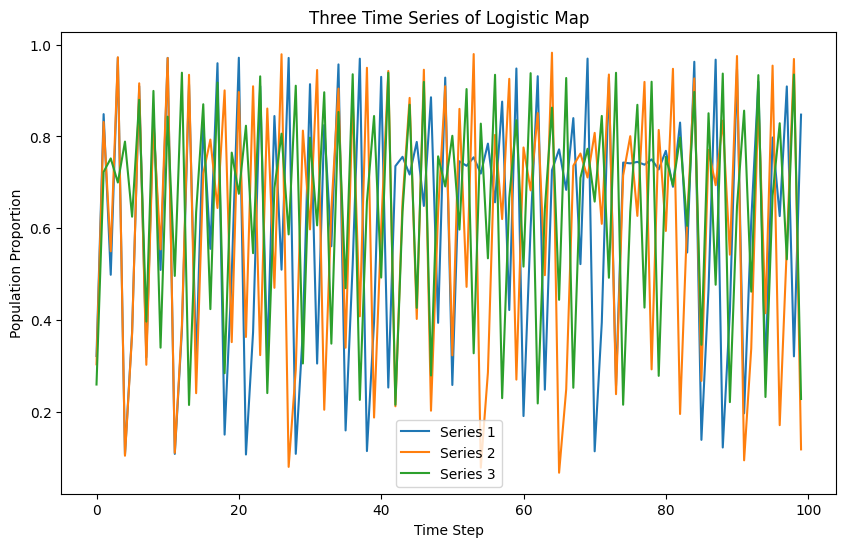

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def logistic_map(r, initial_condition, num_iterations):
    time_series = [initial_condition]
    for _ in range(num_iterations - 1):
        x_n_plus_1 = r * time_series[-1] * (1 - time_series[-1])
        time_series.append(x_n_plus_1)
    return time_series

num_series = 3
num_points = 100
initial_conditions = np.random.rand(num_series)

# Generate and plot 3 time series
plt.figure(figsize=(10, 6))
for i in range(num_series):
    r_value = np.random.uniform(3.5, 4.0)  # Randomly choose an r value
    time_series = logistic_map(r_value, initial_conditions[i], num_points)
    plt.plot(time_series, label=f'Series {i + 1}')

plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Population Proportion')
plt.title('Three Time Series of Logistic Map')
plt.show()

Inference: The time series plot showcases variation of population size over time for r values of
range 3.5-4.0.

## **Demonstration 2: Bifurcation diagram and verification of the Feigenbaum Constant.**

In [5]:
initial_conditions

array([0.32226084, 0.30417793, 0.26018876])

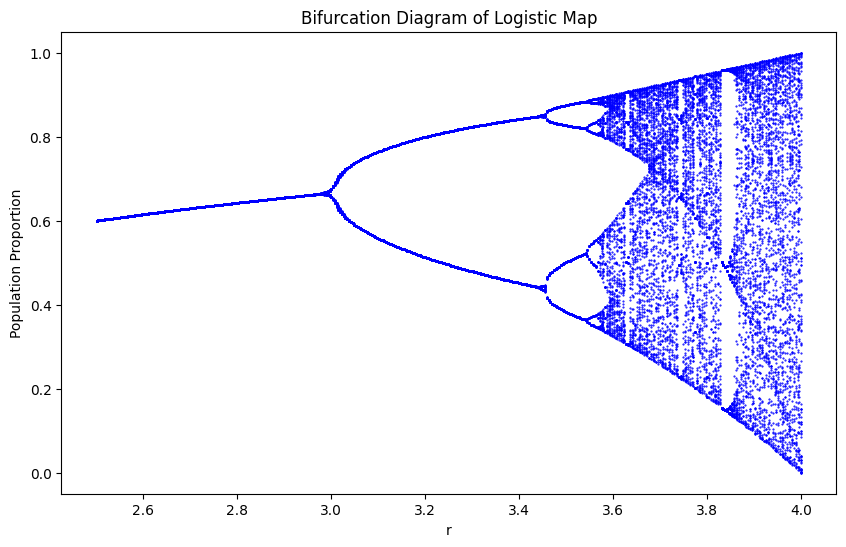

In [6]:
import matplotlib.pyplot as plt

def logistic_map(r, initial_condition, num_iterations):
    time_series = [initial_condition]

    for _ in range(num_iterations - 1):
        x_n = time_series[-1]
        x_n_plus_1 = r * x_n * (1 - x_n)
        time_series.append(x_n_plus_1)

    return time_series
def bifurcation_diagram(min_r, max_r, num_points, num_iterations_per_point, initial_condition):
    r_values = []
    population_values = []

    for point in range(num_points):
        r = min_r + (max_r - min_r) * point / (num_points - 1)
        time_series = logistic_map(r, initial_condition, num_iterations_per_point)

        # Record the last portion of the time series to avoid transient behavior
        r_values.extend([r] * (num_iterations_per_point // 2))
        population_values.extend(time_series[num_iterations_per_point // 2:])

    return r_values, population_values
# Parameters for the bifurcation diagram
min_r = 2.5
max_r = 4.0
num_points = 400
num_iterations_per_point = 200

# Perform the bifurcation diagram simulation
r_values, population_values = bifurcation_diagram(min_r, max_r, num_points, num_iterations_per_point, initial_conditions[0])

# Visualization
plt.figure(figsize=(10, 6))
plt.title("Bifurcation Diagram of Logistic Map")
plt.scatter(r_values, population_values, s=1, color='blue', marker='.')
plt.xlabel("r")
plt.ylabel("Population Proportion")
plt.show()

Inference: The Feigenbaum constant is calculated by calculating the ratio of 2 successive bifurcation lengths and equals to 4.66.

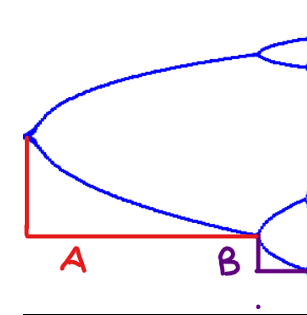

In the case of our generated plot this equals A/B where A is estimated to be 4.35 cm and B was estimated to be 0.93 cm giving the final value as 4.67 ≈ 4.66

## **Demonstration 3: Lyapunov Exponent and chaos.**

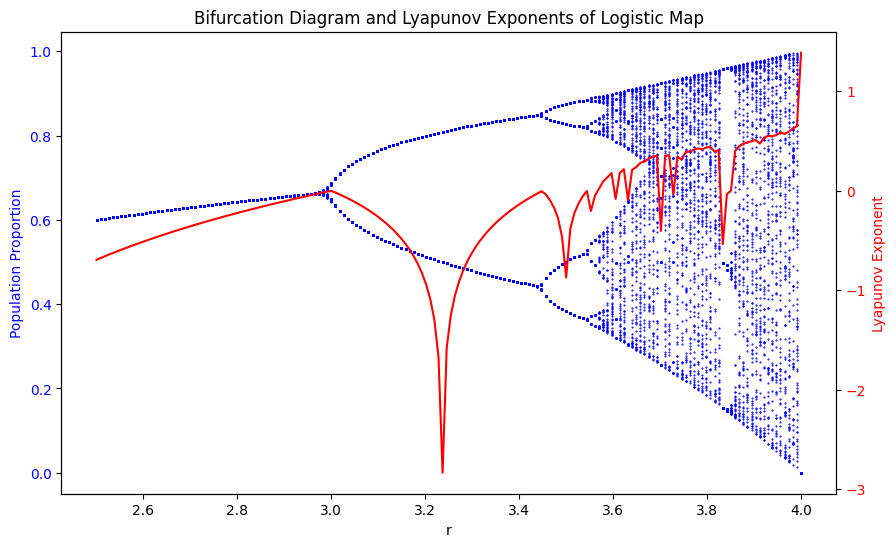

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def logistic_map(r, initial_condition, num_iterations):
    time_series = [initial_condition]

    for _ in range(num_iterations - 1):
        x_n = time_series[-1]
        x_n_plus_1 = r * x_n * (1 - x_n)
        time_series.append(x_n_plus_1)

    return time_series

def lyapunov_exponent(r, initial_condition, num_iterations,
num_lyapunov_iterations):
    x = initial_condition
    sum_lyapunov = 0

    for _ in range(num_iterations):
        x = r * x * (1 - x)

    for _ in range(num_lyapunov_iterations):
        derivative = r - 2 * r * x
        sum_lyapunov += np.log(np.abs(derivative))
        x = r * x * (1 - x)

    return sum_lyapunov / num_lyapunov_iterations

# Parameters for the bifurcation diagram
min_r = 2.5
max_r = 6.0
num_points = 400
num_iterations_per_point = 200
initial_condition = 0.5
num_lyapunov_iterations = 1000

# Calculate bifurcation diagram
r_values, population_values = [], []

for point in range(num_points):
    r = min_r + (max_r - min_r) * point / (num_points - 1)
    time_series = logistic_map(r, initial_condition,
num_iterations_per_point)
    r_values.extend([r] * (num_iterations_per_point // 2))
    population_values.extend(time_series[num_iterations_per_point // 2:])

# Calculate Lyapunov exponents for each r
lyapunov_exponents = [lyapunov_exponent(r, initial_condition,
num_iterations_per_point, num_lyapunov_iterations) for r in r_values]

# Visualization
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bifurcation diagram on the left y-axis
ax1.set_xlabel("r")
ax1.set_ylabel("Population Proportion", color='blue')
ax1.scatter(r_values, population_values, s=1, color='blue', marker='.')
ax1.tick_params(axis='y', labelcolor='blue')

# Lyapunov exponent on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Lyapunov Exponent", color='red')
ax2.plot(r_values, lyapunov_exponents, color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Bifurcation Diagram and Lyapunov Exponents of Logistic Map")
plt.show()

###**Inference:** The Lyapunov exponent is a measure of the average rate of divergence or convergence of nearby trajectories in a dynamical system. In the context of the bifurcation diagram for the logistic map, it provides insights into the sensitivity to initial conditions and the degree of chaos in different regions.

###**Regions of Chaos:** High positive Lyapunov exponents are indicative of chaotic behavior. These regions correspond to parameter values(r) where the system exhibits sensitive dependence on initial conditions and chaotic trajectories.

### **Bifurcation Points:** Bifurcations are observed to hold peak exponent values orchestrating higher values of chaos.



#**Conclusion**

##The logistic map, a simple yet powerful model, demonstrated its ability to exhibit a wide range of behaviors, from stable periodicity to chaotic trajectories. The findings underscore the universality of chaos in nonlinear systems and contribute to understanding of the intricate dynamics that can emerge from seemingly straightforward mathematical models.

##While this study provides valuable insights, it acknowledges certain limitations, such as the numerical approximations employed. Additionally, variations in initial conditions or parameters could lead to different behaviors, warranting further investigation.